In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import time
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import roc_curve, accuracy_score, precision_score, mean_squared_error, confusion_matrix, classification_report, roc_auc_score, plot_confusion_matrix
from sklearn.feature_selection import RFE, SelectPercentile, f_classif, VarianceThreshold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from math import sqrt
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import timeit

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [2]:
df = pd.read_csv("Chocolate.csv")

In [3]:
df.head()

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  Multiple Pieces  sugarpercent  pricepercent  \
0                 1     0    1              0.0         0.732         0.860   
1                 0     0    1              0.0         0.604         0.511   
2                 0     0    0              0.0         0.011         0.116   
3                 0     0    0              0.0         0.011         0.511   
4                 0     0    0              0.0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465

In [4]:
df.shape

(85, 13)

Shape of your Data Set: (85, 13)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  9
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    13 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


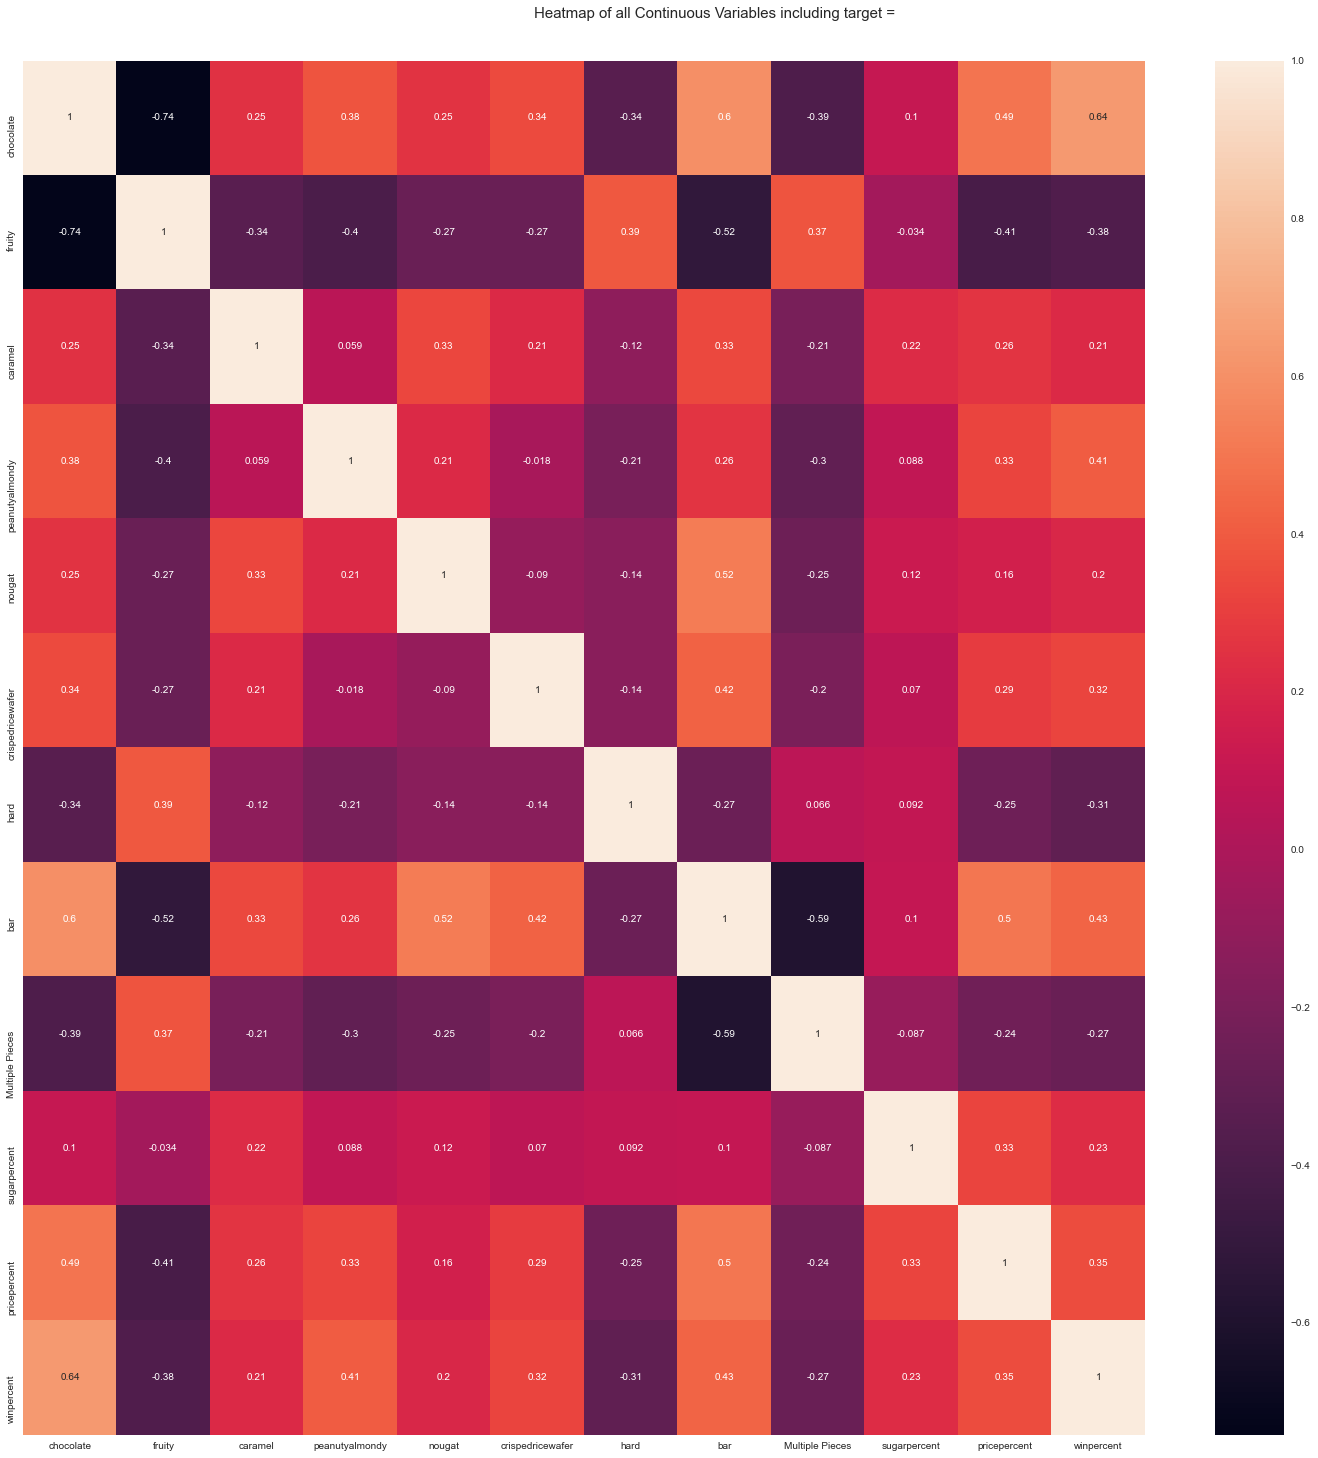

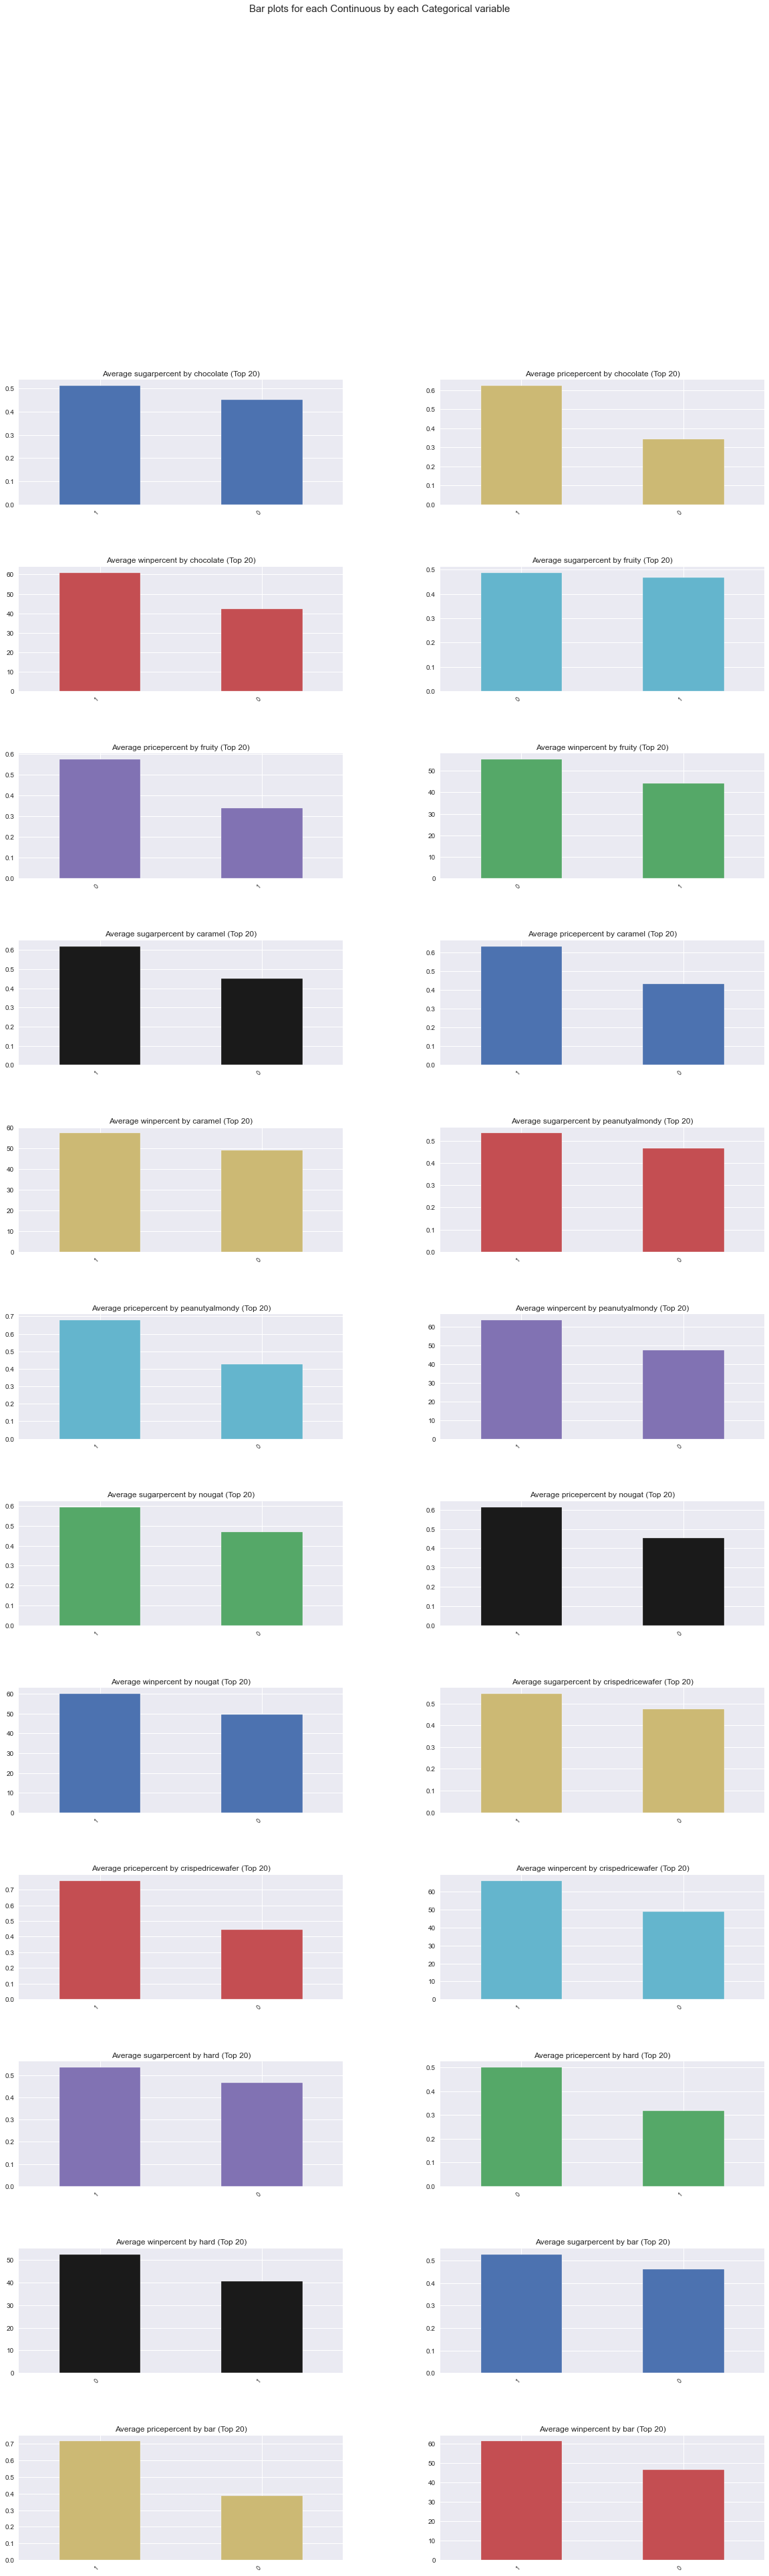

Time to run AutoViz (in seconds) = 8.112

 ###################### VISUALIZATION Completed ########################


chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  \
0           1       0        1               0       0                 1   
1           1       0        0               0       1                 0   
2           0       0        0               0       0                 0   
3           0       0        0               0       0                 0   
4           0       1        0               0       0                 0   
..        ...     ...      ...             ...     ...               ...   
80          0       1        0               0       0                 0   
81          0       1        0               0       0                 0   
82          0       1        0               0       0                 0   
83          0       0        1               0       0                 0   
84          1       0        0               0       0                 1   

    hard  bar  Multiple Pieces  sugarpercent  pricepercent  winpercent  
0      0    1              0.0         0.732         0.860   66.971725  
1      0    1              0.0         0.604         0.511   67.602936  
2      0    0              0.0         0.011         0.116   32.261086  
3      0    0              0.0         0.011         0.511   46.116505  
4      0    0              0.0         0.906         0.511   52.341465  
..   ...  ...              ...           ...           ...         ...  
80     0    0              0.0         0.220         0.116   45.466282  
81     1    0              0.0         0.093         0.116   39.011898  
82     0    0              1.0         0.313         0.313   44.375519  
83     1    0              0.0         0.186         0.267   41.904308  
84     0    0              1.0         0.872         0.848   49.524113  

[85 rows x 12 columns]

In [5]:
AV = AutoViz_Class()
AV.AutoViz('Chocolate.csv', sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=50)

In [6]:
df.isnull().sum().sort_values(ascending=False)

Multiple Pieces     24
pricepercent         3
winpercent           0
sugarpercent         0
bar                  0
hard                 0
crispedricewafer     0
nougat               0
peanutyalmondy       0
caramel              0
fruity               0
chocolate            0
competitorname       0
dtype: int64

In [7]:
df.isna().sum().sort_values(ascending=False)

Multiple Pieces     24
pricepercent         3
winpercent           0
sugarpercent         0
bar                  0
hard                 0
crispedricewafer     0
nougat               0
peanutyalmondy       0
caramel              0
fruity               0
chocolate            0
competitorname       0
dtype: int64

In [8]:
medianOfPricepercent = round(df['pricepercent'].median(), 2)
medianOfPricepercent

0.47

In [9]:
df['pricepercent'].fillna(medianOfPricepercent, inplace = True)

In [10]:
df.drop('Multiple Pieces', axis = 1, inplace = True)

In [11]:
df.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

In [12]:
df.describe()

chocolate     fruity    caramel  peanutyalmondy     nougat  \
count  85.000000  85.000000  85.000000       85.000000  85.000000   
mean    0.435294   0.447059   0.164706        0.164706   0.082353   
std     0.498738   0.500140   0.373116        0.373116   0.276533   
min     0.000000   0.000000   0.000000        0.000000   0.000000   
25%     0.000000   0.000000   0.000000        0.000000   0.000000   
50%     0.000000   0.000000   0.000000        0.000000   0.000000   
75%     1.000000   1.000000   0.000000        0.000000   0.000000   
max     1.000000   1.000000   1.000000        1.000000   1.000000   

       crispedricewafer       hard        bar  sugarpercent  pricepercent  \
count         85.000000  85.000000  85.000000     85.000000     85.000000   
mean           0.082353   0.176471   0.247059      0.478647      0.467294   
std            0.276533   0.383482   0.433861      0.282778      0.278819   
min            0.000000   0.000000   0.000000      0.011000      0.011000   
25%            0.000000   0.000000   0.000000      0.220000      0.267000   
50%            0.000000   0.000000   0.000000      0.465000      0.470000   
75%            0.000000   0.000000   0.000000      0.732000      0.651000   
max            1.000000   1.000000   1.000000      0.988000      0.976000   

       winpercent  
count   85.000000  
mean    50.316764  
std     14.714357  
min     22.445341  
25%     39.141056  
50%     47.829754  
75%     59.863998  
max     84.180290

In [13]:
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  \
0          1       0        1               0       0                 1     0   
1          1       0        0               0       1                 0     0   
2          0       0        0               0       0                 0     0   
3          0       0        0               0       0                 0     0   
4          0       1        0               0       0                 0     0   

   bar  sugarpercent  pricepercent  winpercent  
0    1         0.732         0.860   66.971725  
1    1         0.604         0.511   67.602936  
2    0         0.011         0.116   32.261086  
3    0         0.011         0.511   46.116505  
4    0         0.906         0.511   52.341465

In [14]:
sns.set_style("white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})

palette_style = "coolwarm"
color = "blue"

array([[<AxesSubplot:title={'center':'bar'}>,
        <AxesSubplot:title={'center':'caramel'}>,
        <AxesSubplot:title={'center':'chocolate'}>],
       [<AxesSubplot:title={'center':'crispedricewafer'}>,
        <AxesSubplot:title={'center':'fruity'}>,
        <AxesSubplot:title={'center':'hard'}>],
       [<AxesSubplot:title={'center':'nougat'}>,
        <AxesSubplot:title={'center':'peanutyalmondy'}>,
        <AxesSubplot:title={'center':'pricepercent'}>],
       [<AxesSubplot:title={'center':'sugarpercent'}>,
        <AxesSubplot:title={'center':'winpercent'}>, <AxesSubplot:>]],
      dtype=object)

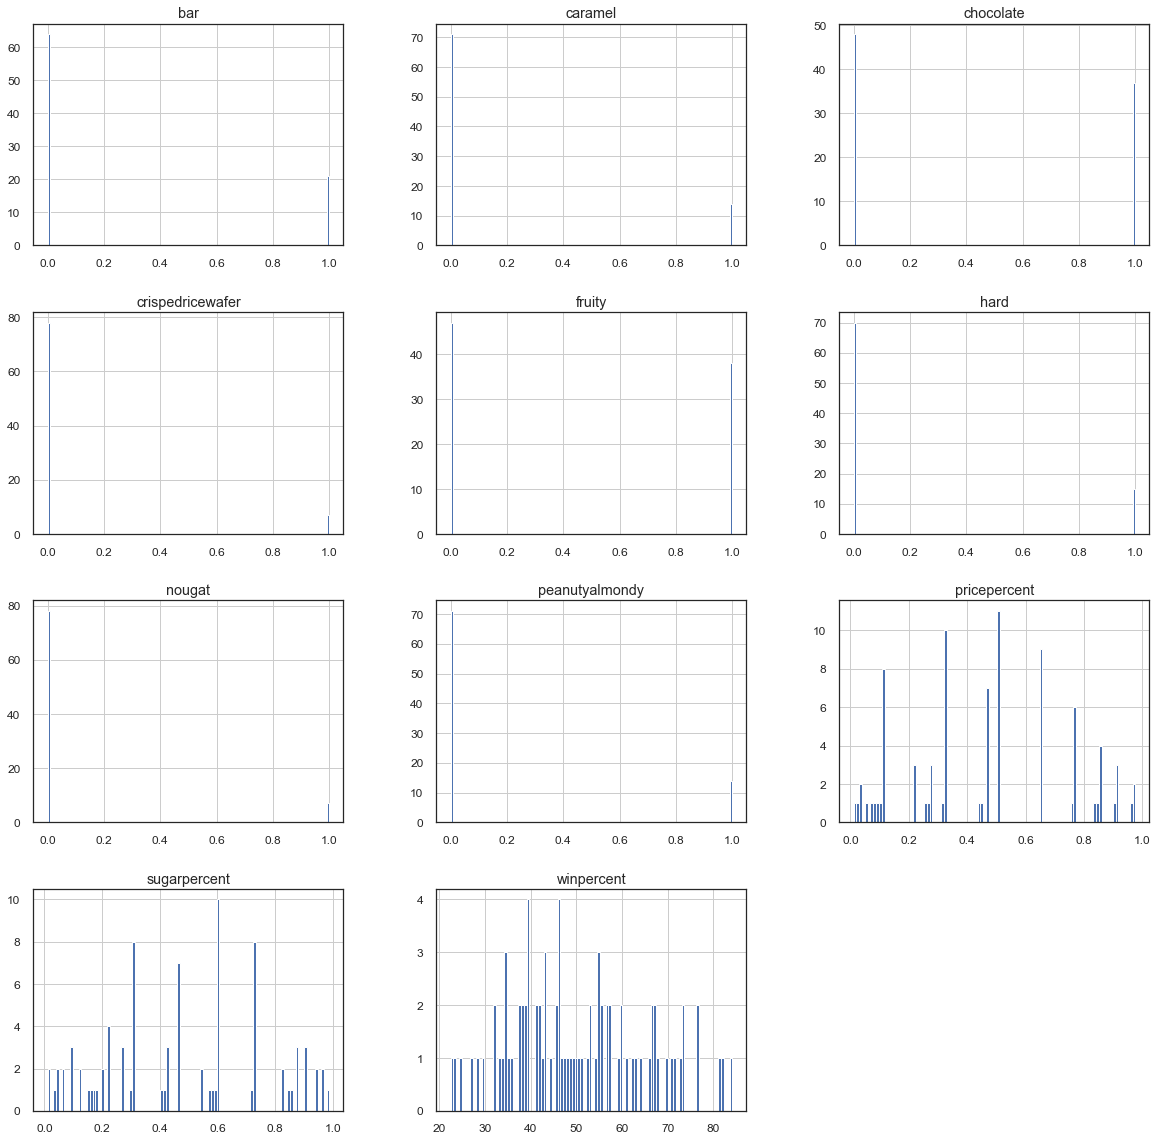

In [15]:
df_num.hist(figsize=(20, 20), bins=100, xlabelsize=12, ylabelsize=12)

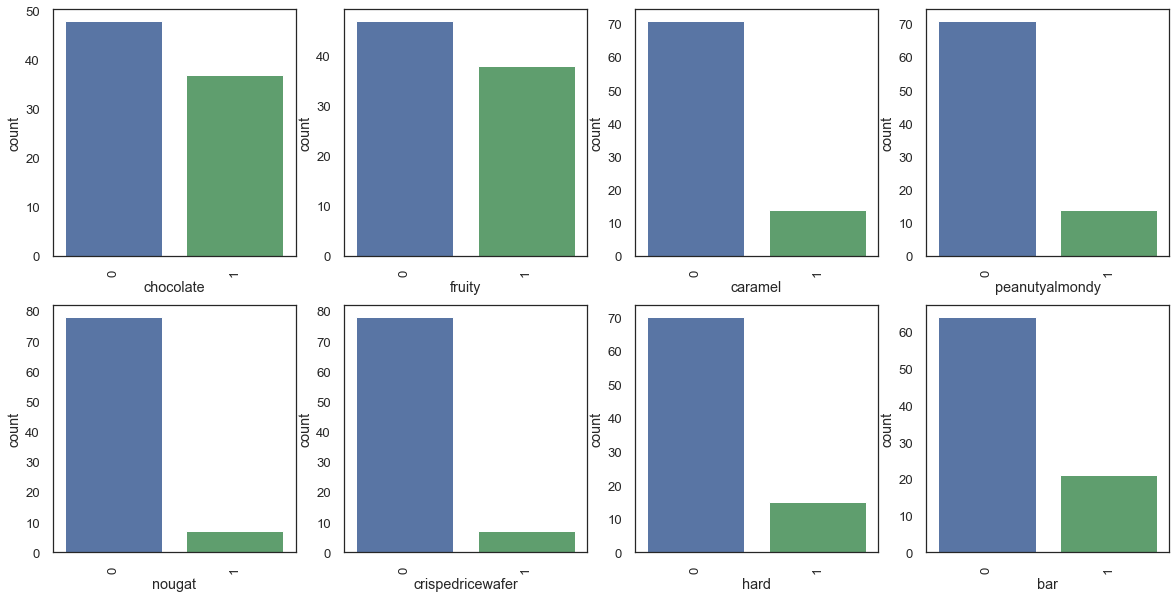

In [16]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
categorical = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar']
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [17]:
#Checking for Outliers and suspecious data:
def box(var):
    # this function take the variable and return a boxplot for each type of fish
    sns.boxplot(x="chocolate", y=var, data=df,palette='Set2')
fig, ax = plt.subplots(3, 1,figsize=(15,20))
plt.subplot(3,1,1)
box('sugarpercent')
plt.subplot(3,1,2)
box('pricepercent')
plt.subplot(3,1,3)
box('winpercent')

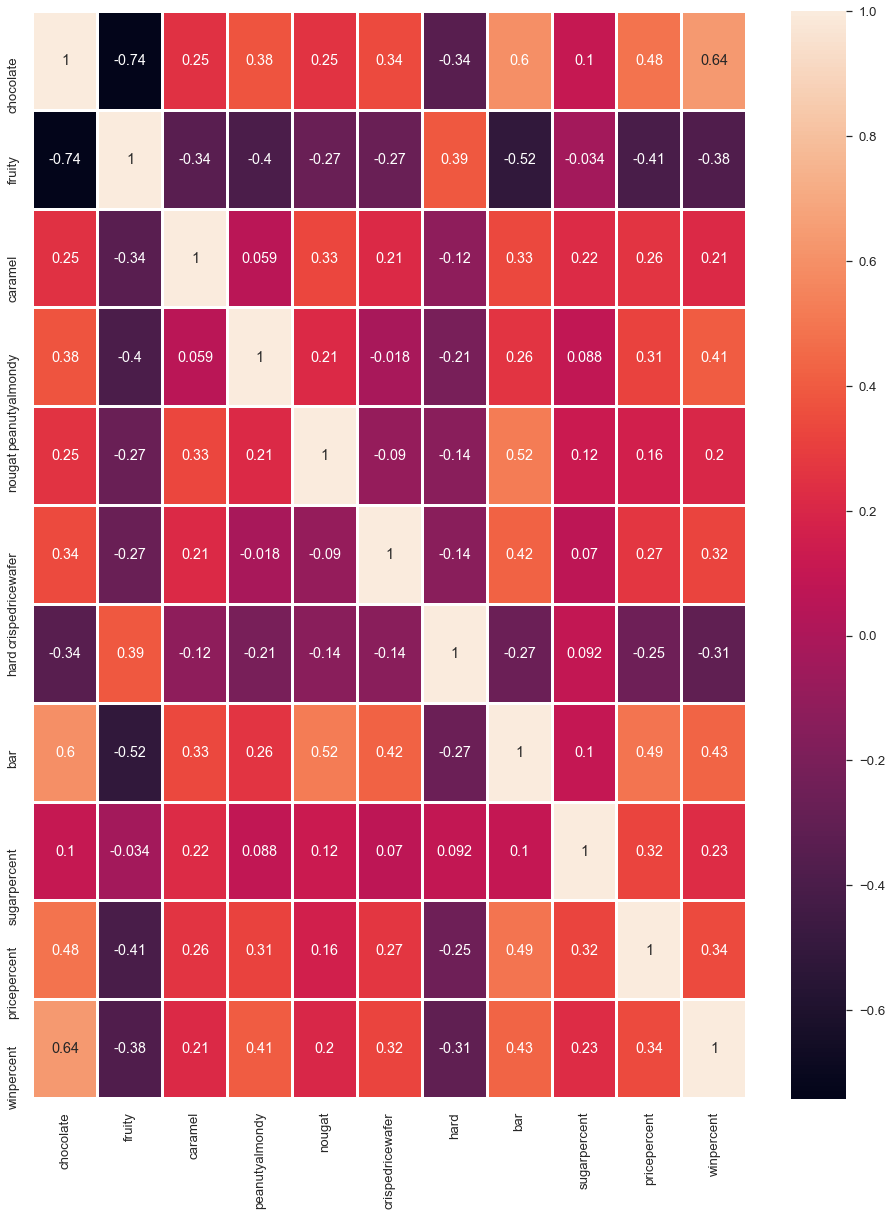

In [18]:
# Heat Map
df.corr()
plt.figure(figsize=(16, 20))
sns.heatmap(df.corr(), annot=True, linewidths=2)
plt.show()

In [19]:
df = df.sort_values(by="chocolate", ascending=True)

plt.figure(figsize=(20,20))
sns.barplot(y=df["competitorname"], x=df["chocolate"])
pal = sns.color_palette("Greens_d", len(df))
rank = df.chocolate.argsort().argsort()
sns.barplot(x=df.chocolate, y=df.competitorname, palette=np.array(pal[::-1])[rank])

<AxesSubplot:xlabel='chocolate', ylabel='competitorname'>

In [20]:
df['bar'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

<AxesSubplot:>

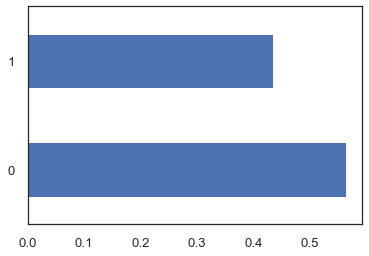

In [21]:
df['chocolate'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

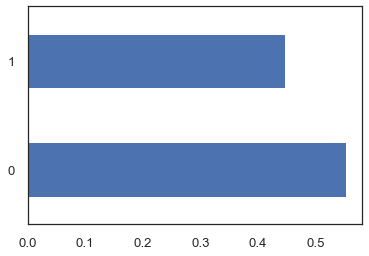

In [22]:
df['fruity'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

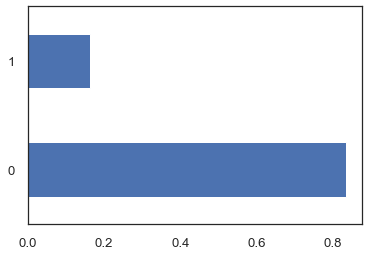

In [23]:
df['caramel'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

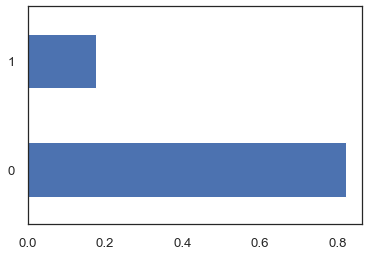

In [24]:
df['hard'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

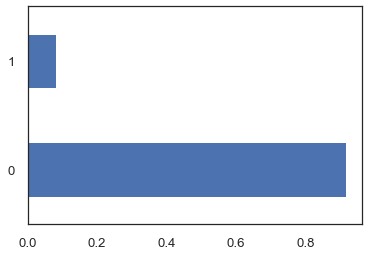

In [25]:
df['nougat'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

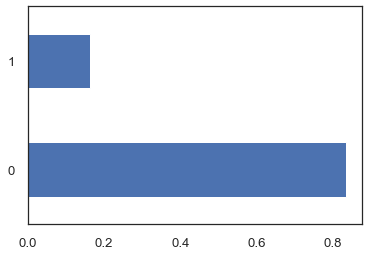

In [26]:
df['peanutyalmondy'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

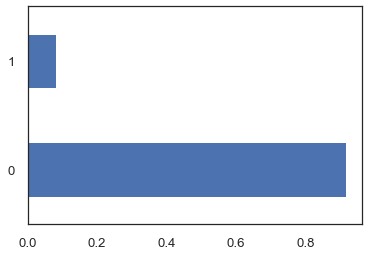

In [27]:
df['crispedricewafer'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

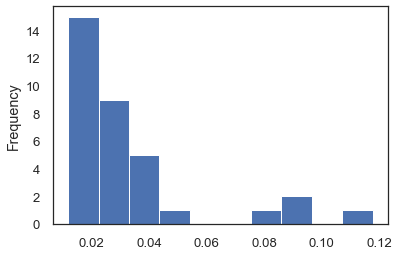

In [28]:
df['sugarpercent'].value_counts(normalize=True).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

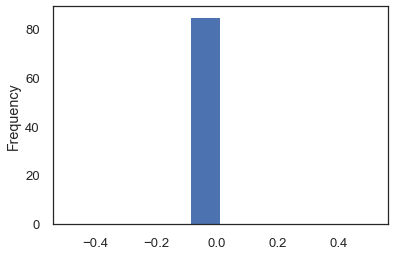

In [29]:
df['winpercent'].value_counts(normalize=True).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

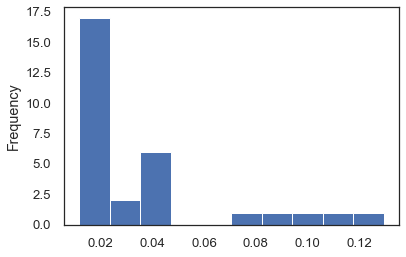

In [30]:
df['pricepercent'].value_counts(normalize=True).plot(kind='hist')

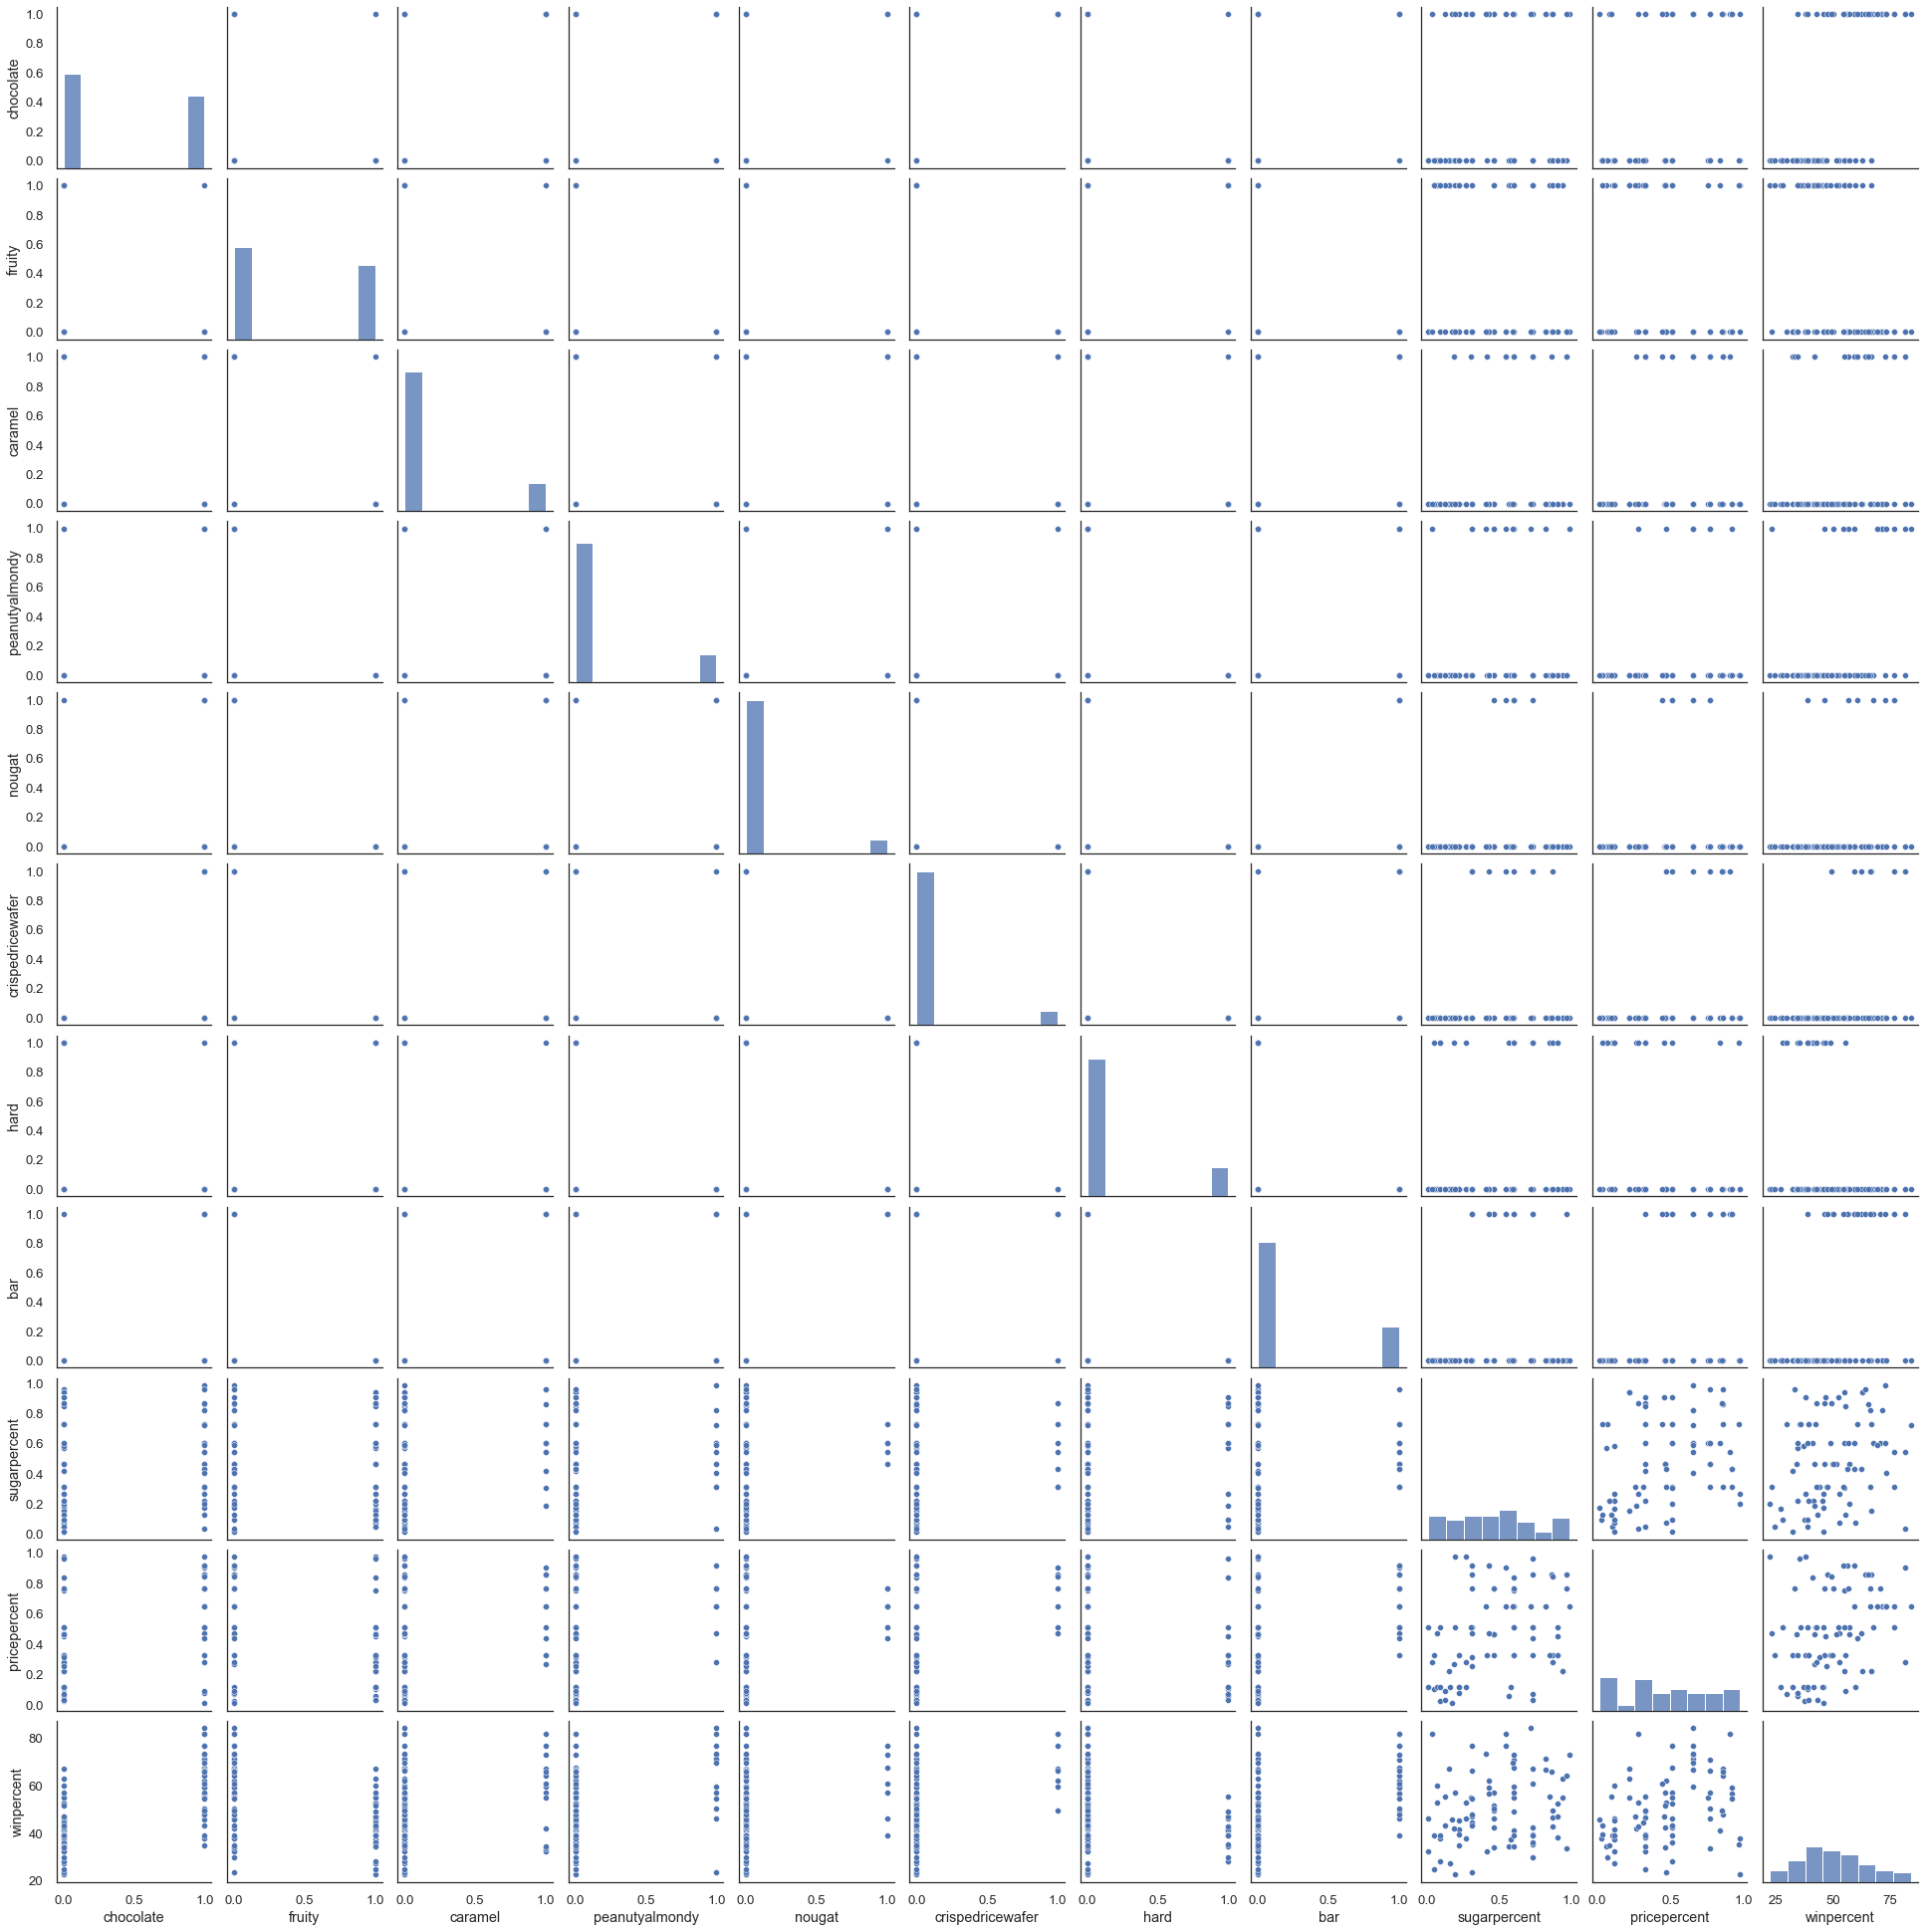

In [31]:
# Searborn's Pair Plot
sns.pairplot(data = df, vars=['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'sugarpercent',
       'pricepercent', 'winpercent'])
plt.show()

In [32]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [33]:
target_name = 'chocolate'

In [34]:
sns.distplot(df[target_name], bins=20, color = 'blue')

plt.title("Distribution of Win % on the Data")
plt.ylabel("Density")
plt.show()

In [35]:
ind_vars = ['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar']
df[ind_vars] = df[ind_vars].astype(bool)

In [36]:
# list of numerical variables
num_vars_list = df.select_dtypes(include=['int', 'float']).columns.tolist()

# remove dependent variable from numerical variable list
num_feature_list = [f for f in num_vars_list if not f==target_name]
num_feature_list

['sugarpercent', 'pricepercent', 'winpercent']

In [37]:
df.isnull().sum().sort_values(ascending=False)

winpercent          0
pricepercent        0
sugarpercent        0
bar                 0
hard                0
crispedricewafer    0
nougat              0
peanutyalmondy      0
caramel             0
fruity              0
chocolate           0
competitorname      0
dtype: int64

In [38]:
df.isna().sum().sort_values(ascending=False)

winpercent          0
pricepercent        0
sugarpercent        0
bar                 0
hard                0
crispedricewafer    0
nougat              0
peanutyalmondy      0
caramel             0
fruity              0
chocolate           0
competitorname      0
dtype: int64

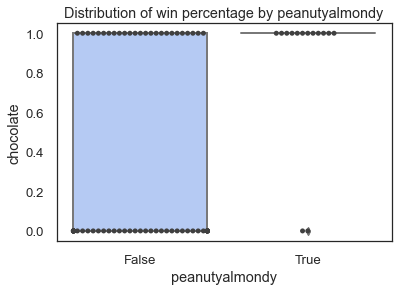

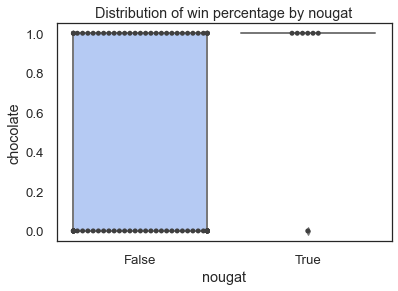

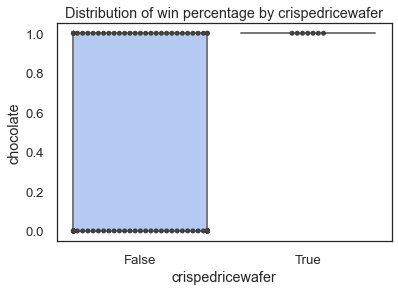

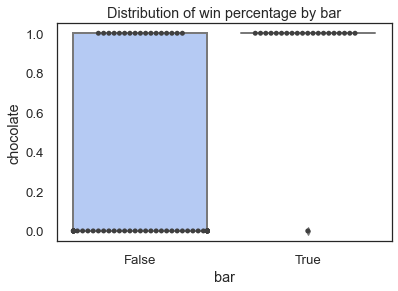

In [39]:
for feature_name in ind_vars:
    
    ax = sns.boxplot(x=feature_name, y=target_name, data=df, palette=palette_style)
    ax = sns.swarmplot(x=feature_name, y=target_name, data=df, color=".25")
    
    # Format plot title
    plot_title_str = 'Distribution of win percentage by {}'.format(feature_name)    
    plt.title(plot_title_str)
    
    # Format file name
    file_name_str = "./plots/target_dist_by_{}".format(feature_name)
    plt.show();

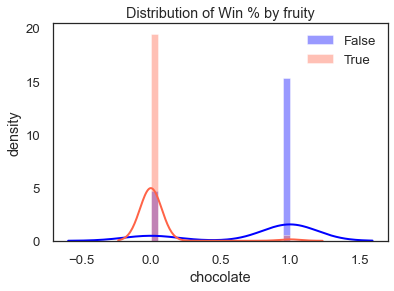

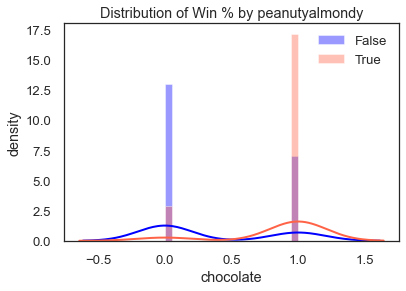

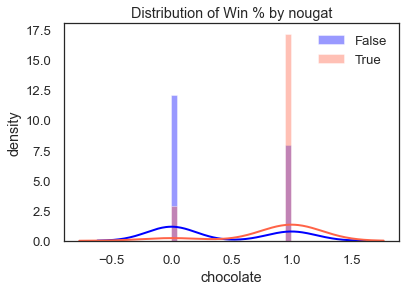

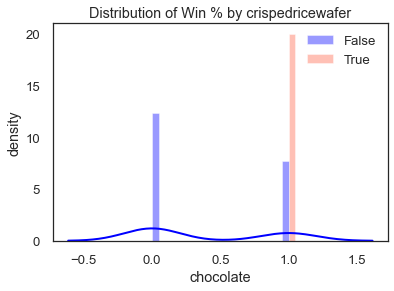

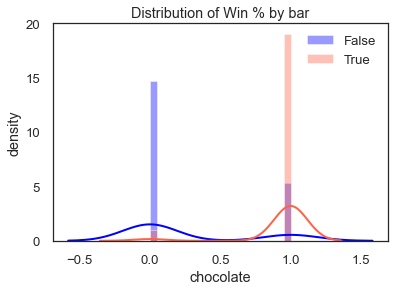

In [40]:
for feature_name in ind_vars:
    
    sns.distplot(df.loc[df[feature_name]==False, target_name], bins=20, color = 'blue', label='False')
    sns.distplot(df.loc[df[feature_name]==True, target_name], bins=20, color = 'tomato', label='True')
    
    # Format plot title
    plot_title_str = 'Distribution of Win % by {}'.format(feature_name)
    plt.ylabel("density")
    plt.title(plot_title_str)
    
    plt.legend()
    plt.show()

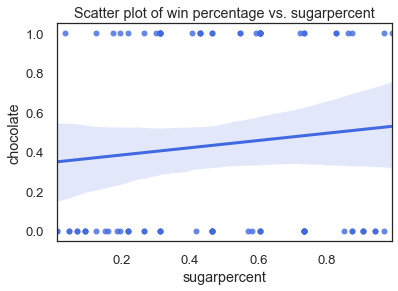

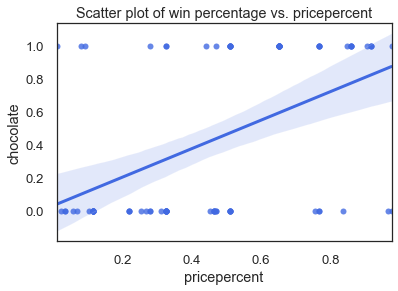

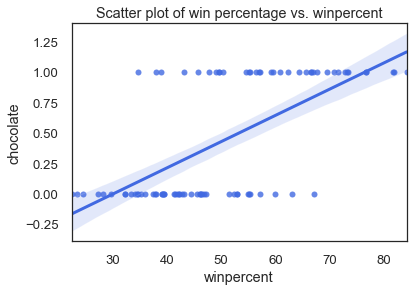

In [41]:
for feature_name in num_vars_list:
    
    ax = sns.regplot(x=feature_name, y=target_name, data=df, color='royalblue')
    
    # Format plot title
    plot_title_str = 'Scatter plot of win percentage vs. {}'.format(feature_name)    
    plt.title(plot_title_str)
    
    # Format file name
    file_name_str = "./plots/target_regression_by_{}".format(feature_name)
    
    plt.show();

In [42]:
f1 = 'chocolate'
f2 = 'fruity'
df_aux = pd.DataFrame(np.zeros((2, 2)), index=[[f1, f1],['Yes','No']], columns=[[f2, f2],['Yes','No']])

idx = pd.IndexSlice
df_aux.loc[idx[f1,'No'], idx[:,'No']] = df[(df[f1]==False) & (df[f2]==False)].count()[0]
df_aux.loc[idx[f1,'No'], idx[:,'Yes']] = df[(df[f1]==False) & (df[f2]==True)].count()[0]
df_aux.loc[idx[f1,'Yes'], idx[:,'No']] = df[(df[f1]==True) & (df[f2]==False)].count()[0]
df_aux.loc[idx[f1,'Yes'], idx[:,'Yes']] = df[(df[f1]==True) & (df[f2]==True)].count()[0]
assert df_aux.sum().sum() == 85
df_aux.astype(int)

fruity    
                 Yes  No
chocolate Yes      1  36
          No      37  11

In [ ]:
## Linear Regression

In [ ]:
# def regression_results(y_true, y_pred):
#     explained_variance=metrics.explained_variance_score(y_true, y_pred)
#     mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
#     mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
#     median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
#     r2=metrics.r2_score(y_true, y_pred)

#     print('Explained Varaiance: ', round(explained_variance,4))    
#     print('Mean Squared Log Error: ', round(mean_squared_log_error,4))
#     print('r2: ', round(r2,4))
#     print('MAE: ', round(mean_absolute_error,4))
#     print('MSE: ', round(mse,4))
#     print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
# linear_reg_formula = target_name + ' ~ ' + ' + '.join([col for col in df.columns[:] if col!=target_name and col!='competitorname' and col!='Multiple Pieces'])
# print(linear_reg_formula)

In [ ]:
# lin_reg_model = sm.OLS(formula=linear_reg_formula, data=df).fit()
# print(lin_reg_model.summary())


# # X_opt = X[:,[0,1,2,3,4,5]]
# # #OrdinaryLeastSquares
# # regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()

In [43]:
df.drop('competitorname', axis = 1, inplace = True)

In [44]:
print(df['fruity'].unique())
print(df['caramel'].unique())
print(df['peanutyalmondy'].unique())
print(df['nougat'].unique())
print(df['crispedricewafer'].unique())
print(df['hard'].unique())
print(df['bar'].unique())

[ True False]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]


In [45]:
df['fruity'] = le.fit_transform(df['fruity'])
df['caramel'] = le.fit_transform(df['caramel'])
df['peanutyalmondy'] = le.fit_transform(df['peanutyalmondy'])
df['nougat'] = le.fit_transform(df['nougat'])
df['crispedricewafer'] = le.fit_transform(df['crispedricewafer'])
df['hard'] = le.fit_transform(df['hard'])
df['bar'] = le.fit_transform(df['bar'])

In [ ]:
# df.astype({'sugarpercent': 'float64', 'pricepercent': 'float64', 'winpercent': 'float64'}).dtypes

In [ ]:
# for i in ['sugarpercent', 'pricepercent', 'winpercent']:
#     df[i] = df[i].fillna(0).astype(np.float64)

In [ ]:
# df.dtypes

In [46]:
y = df['chocolate']
X = df.drop('chocolate', axis = 1)

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10086)

In [48]:
# LR

LRstart_time = datetime.now()
logRegModel = LogisticRegression(random_state=5, solver='liblinear').fit(X_train, y_train)
logRegModel.score(X_train, y_train)
y_predict = logRegModel.predict(X_test)
lrcm = confusion_matrix(y_test,y_predict)

print('Speed:', datetime.now() - LRstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_predict))
print("ROC AUC Score:", metrics.roc_auc_score(y_train, logRegModel.predict_proba(X_train)[:, 1]))
print('Confusion Matrix:')
print(pd.DataFrame(lrcm))
print("Classification Report:")
print(classification_report(y_test, y_predict))

Speed: 0:00:00.011965
Accuracy: 0.8823529411764706
Precision: 1.0
Recall: 0.75
Mean Squared Error: 0.11764705882352941
ROC AUC Score: 0.9708222811671087
Confusion Matrix:
   0  1
0  9  0
1  2  6
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.75      0.86         8

    accuracy                           0.88        17
   macro avg       0.91      0.88      0.88        17
weighted avg       0.90      0.88      0.88        17



In [49]:
lrc = sns.heatmap(lrcm, annot=True)
lrc

<AxesSubplot:>

In [89]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit(method='lbfgs')
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              chocolate   No. Observations:                   68
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                            9
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                  0.5716
Time:                        00:52:21   Log-Likelihood:                -19.875
converged:                      False   LL-Null:                       -46.396
Covariance Type:            nonrobust   LLR p-value:                 2.869e-08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
fruity              -4.2096      1.265     -3.327      0.001      -6.690      -1.729
caramel             -0.5985      1.077     -0.556      0.578      -2.710       1.513
peanutyalmondy      -0.1901 

In [62]:
print(result.pvalues)

fruity              0.000879
caramel             0.578500
peanutyalmondy      0.866264
nougat              0.655641
crispedricewafer    0.555318
hard                0.684852
bar                 0.287144
sugarpercent        0.582796
pricepercent        0.953596
winpercent          0.206740
dtype: float64


In [63]:
logRegImp = logRegModel.coef_[0]
logRegImp

array([-2.10730648, -0.03308806,  0.23221175, -0.09922048,  0.56192751,
       -0.2504548 ,  1.13610284, -0.1325854 ,  0.30271297,  0.04558709])

In [64]:
for i,v in enumerate(logRegImp):
    print('Feature: %0d, Score: %.9f' % (i,v))

Feature: 0, Score: -2.107306482
Feature: 1, Score: -0.033088060
Feature: 2, Score: 0.232211746
Feature: 3, Score: -0.099220476
Feature: 4, Score: 0.561927512
Feature: 5, Score: -0.250454801
Feature: 6, Score: 1.136102839
Feature: 7, Score: -0.132585400
Feature: 8, Score: 0.302712969
Feature: 9, Score: 0.045587086


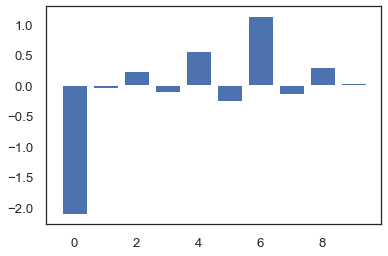

In [65]:
# plot feature importance
plt.bar([x for x in range(len(logRegImp))], logRegImp)
plt.show()

In [66]:
np.round(logRegModel.coef_, decimals=2) > 0

array([[False, False,  True, False,  True, False,  True, False,  True,
         True]])

In [67]:
LRCols = X.columns

In [68]:
predictors = X_train
selector = RFE(logRegModel, n_features_to_select=1)
selector = selector.fit(predictors, y_train)

In [69]:
order = selector.ranking_
order

array([ 1, 10,  5,  8,  4,  6,  2,  7,  3,  9])

In [70]:
feature_ranks = []
for i in order:
    feature_ranks.append(f"{i}. {df.columns[i]}")
sorted(feature_ranks)

['1. fruity',
 '10. winpercent',
 '2. caramel',
 '3. peanutyalmondy',
 '4. nougat',
 '5. crispedricewafer',
 '6. hard',
 '7. bar',
 '8. sugarpercent',
 '9. pricepercent']

In [71]:
df_cof_LR = pd.Series(logRegImp,LRCols)

In [72]:
df_cof_LR.sort_values().plot(kind='barh', figsize=(12, 10), alpha=0.5)

<AxesSubplot:>

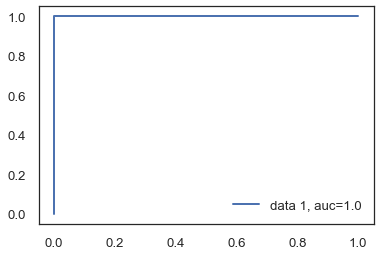

In [73]:
y_pred_proba = logRegModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Text(0, 0.5, 'Chocolate/Not')

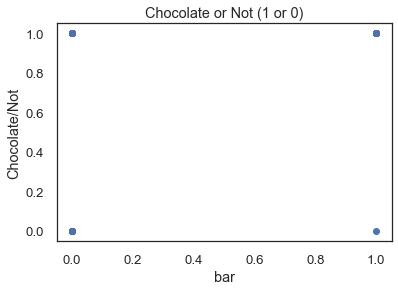

In [74]:
import matplotlib.pyplot as plt
plt.scatter(X_train["bar"].values,y_train.values)
plt.title("Chocolate or Not (1 or 0)")
plt.xlabel("bar")
plt.ylabel("Chocolate/Not")

In [75]:
# DT
DTstart_time = datetime.now()

treemodel = DecisionTreeClassifier(max_depth=3)
treemodel.fit(X_train, y_train)
dty_predict = treemodel.predict(X_test)
dtcm = confusion_matrix(y_test,dty_predict)

print('Speed:', datetime.now() - DTstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, dty_predict))
print("Precision:",metrics.precision_score(y_test, dty_predict))
print("Recall:",metrics.recall_score(y_test, dty_predict))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, dty_predict))
print("ROC AUC Score:", metrics.roc_auc_score(y_train, treemodel.predict_proba(X_train)[:, 1]))
print('Confusion Matrix:')
print(pd.DataFrame(dtcm))
print("Classification Report:")
print(classification_report(y_test, dty_predict))

Speed: 0:00:00.008976
Accuracy: 0.7647058823529411
Precision: 0.8333333333333334
Recall: 0.625
Mean Squared Error: 0.23529411764705882
ROC AUC Score: 0.997789566755084
Confusion Matrix:
   0  1
0  8  1
1  3  5
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.83      0.62      0.71         8

    accuracy                           0.76        17
   macro avg       0.78      0.76      0.76        17
weighted avg       0.78      0.76      0.76        17



<AxesSubplot:>

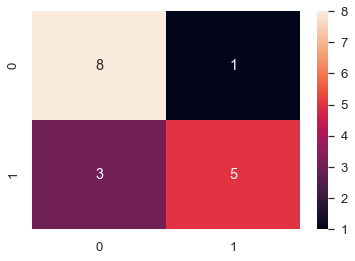

In [76]:
dtc = sns.heatmap(dtcm, annot=True)
dtc

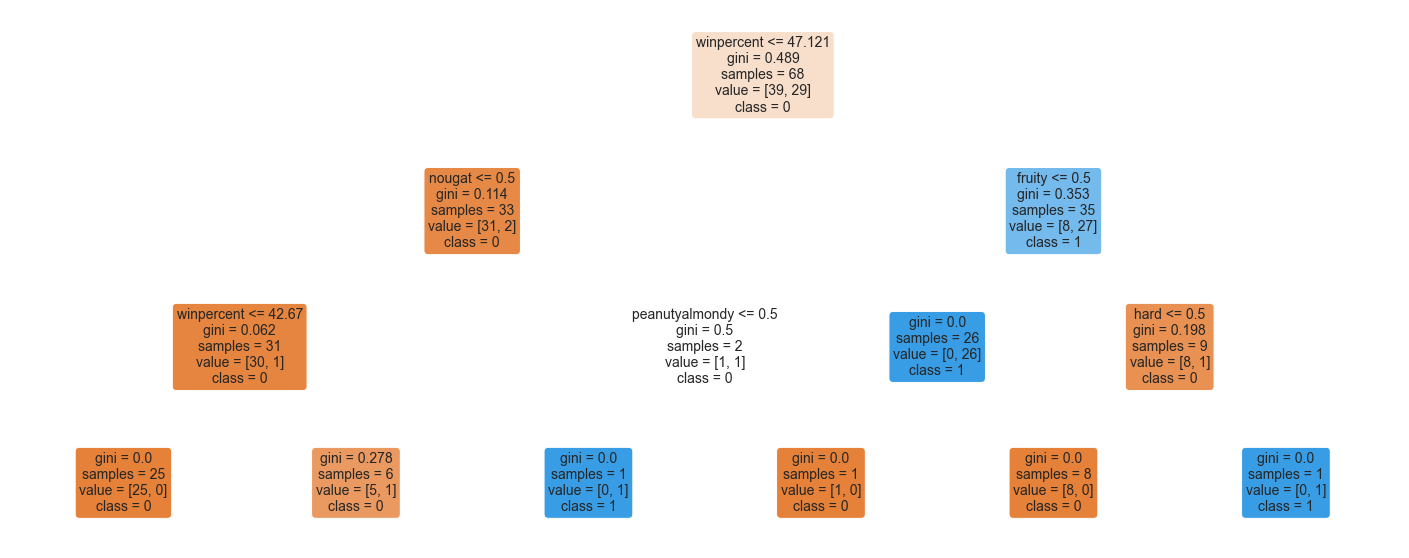

In [77]:
plt.figure(figsize=(25,10))
plot=tree.plot_tree(treemodel,feature_names=X.columns.values.tolist(),class_names=['0','1'],filled=True,rounded=True,fontsize=14)
plt.show()

In [78]:
dtimp = treemodel.feature_importances_
df_cof_DT = pd.Series(dtimp,X.columns)
df_cof_DT

fruity              0.334359
caramel             0.000000
peanutyalmondy      0.031648
nougat              0.026017
crispedricewafer    0.000000
hard                0.056262
bar                 0.000000
sugarpercent        0.000000
pricepercent        0.000000
winpercent          0.551714
dtype: float64

<AxesSubplot:>

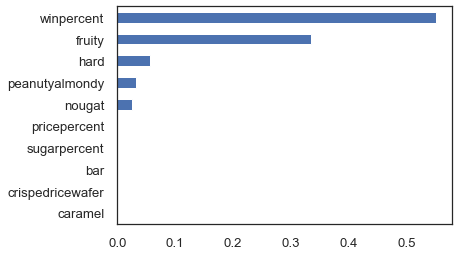

In [79]:
df_cof_DT.head(18).sort_values().plot.barh()

In [90]:
# RF
RFstart_time = datetime.now()

rfclass=RandomForestClassifier(random_state=0)
rfclass.fit(X_train, y_train)
rfypred=rfclass.predict(X_test)
rfclass.score(X_test, y_test)
rfcm = confusion_matrix(y_test,rfypred)

print('Speed:', datetime.now() - RFstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, rfypred))
print("Precision:",metrics.precision_score(y_test, rfypred))
print("Recall:",metrics.recall_score(y_test, rfypred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, rfypred))
print("ROC AUC Score:", metrics.roc_auc_score(y_train, rfclass.predict_proba(X_train)[:, 1]))
print('Confusion Matrix:')
print(pd.DataFrame(rfcm))
print("Classification Report:")
print(classification_report(y_test, rfypred))

Speed: 0:00:00.190528
Accuracy: 0.7647058823529411
Precision: 1.0
Recall: 0.5
Mean Squared Error: 0.23529411764705882
ROC AUC Score: 1.0
Confusion Matrix:
   0  1
0  9  0
1  4  4
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      0.50      0.67         8

    accuracy                           0.76        17
   macro avg       0.85      0.75      0.74        17
weighted avg       0.84      0.76      0.75        17



<AxesSubplot:>

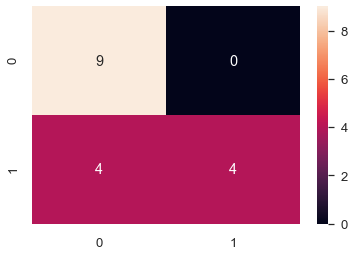

In [81]:
rfc = sns.heatmap(rfcm, annot=True)
rfc

In [82]:
rfimp = rfclass.feature_importances_
df_cof_RF = pd.Series(rfimp,X.columns)
df_cof_RF

fruity              0.203425
caramel             0.009196
peanutyalmondy      0.035527
nougat              0.015588
crispedricewafer    0.012645
hard                0.019428
bar                 0.122032
sugarpercent        0.073417
pricepercent        0.156880
winpercent          0.351863
dtype: float64

<AxesSubplot:>

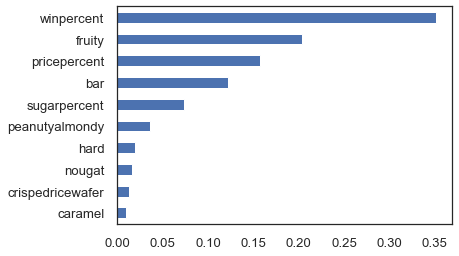

In [83]:
df_cof_RF.head(18).sort_values().plot.barh()

In [84]:
# GBC
GBstart_time = datetime.now()

gbclass=GradientBoostingClassifier(random_state=0, n_estimators=1000)
gbclass.fit(X_train, y_train)
gbypred=gbclass.predict(X_test)
gbclass.score(X_test, y_test)
gbcm = confusion_matrix(y_test,gbypred)

print('Speed:', datetime.now() - GBstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, gbypred))
print("Precision:",metrics.precision_score(y_test, gbypred))
print("Recall:",metrics.recall_score(y_test, gbypred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, gbypred))
print("ROC AUC Score:", metrics.roc_auc_score(y_train, gbclass.predict_proba(X_train)[:, 1]))
print('Confusion Matrix:')
print(pd.DataFrame(gbcm))
print("Classification Report:")
print(classification_report(y_test, gbypred))

Speed: 0:00:00.575457
Accuracy: 0.8235294117647058
Precision: 1.0
Recall: 0.625
Mean Squared Error: 0.17647058823529413
ROC AUC Score: 1.0
Confusion Matrix:
   0  1
0  9  0
1  3  5
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.62      0.77         8

    accuracy                           0.82        17
   macro avg       0.88      0.81      0.81        17
weighted avg       0.87      0.82      0.82        17



<AxesSubplot:>

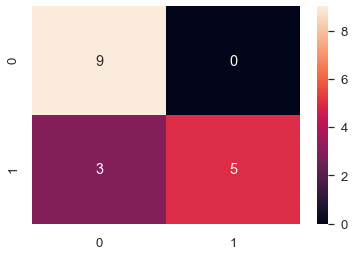

In [85]:
gbc = sns.heatmap(gbcm, annot=True)
gbc

In [86]:
gbimp = gbclass.feature_importances_
df_cof_GB = pd.Series(gbimp,X.columns)
df_cof_GB

fruity              3.492011e-01
caramel             3.500303e-05
peanutyalmondy      1.257288e-02
nougat              7.468414e-03
crispedricewafer    2.750495e-33
hard                2.499215e-02
bar                 1.251646e-02
sugarpercent        1.239187e-02
pricepercent        1.197529e-02
winpercent          5.688468e-01
dtype: float64

<AxesSubplot:>

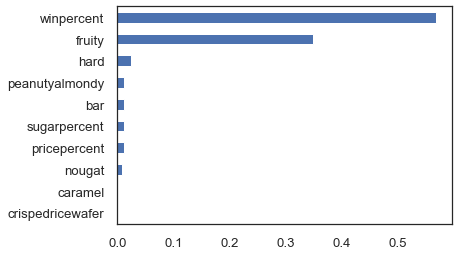

In [87]:
df_cof_GB.head(18).sort_values().plot.barh()